In [1]:
import sympy
from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt

import scipy.signal as sp

# Use either

sympy.init_session
#sympy.init_printing(use_unicode=True)
sympy.init_printing(use_latex='mathjax')

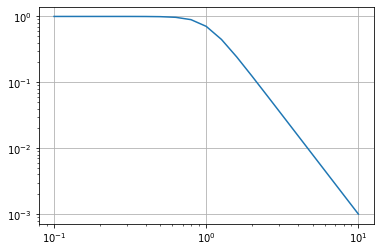

In [2]:
s=sympy.symbols('s')
h=1/(s**3+2*s**2+2*s+1)
w=np.logspace(-1,1,21)
ss=1j*w
f=sympy.lambdify(s,h,"numpy")

plt.loglog(w,np.abs(f(ss)))
plt.grid(True)
plt.show()

In [3]:
def lowpass(R1,R2,C1,C2,G,Vi):
    s=sympy.symbols('s')
    A=sympy.Matrix([[0,0,1,-1/G],[-1/(1+s*R2*C2),1,0,0], \
    [0,-G,0,1],[-1/R1-1/R2-s*C1,1/R2,0,s*C1]])
    b=sympy.Matrix([0,0,0,Vi/R1])
    V=A.inv()*b
    return (A,b,V)

In [4]:
A,b,V=lowpass(10000,10000,1e-9,1e-9,1.586,1)

print ('G=1000')
Vo=V[3]
# Computed inverse
print ("Computed Inverse")
display(Vo)
# Simplify existing expression
print ("Simplified Expression")
Vo=sympy.simplify(Vo)
display(Vo)

s=sympy.symbols('s')
display((1/Vo).coeff(s))

a=sympy.Poly(1/Vo,s)
display(a.all_coeffs())

w=np.logspace(0,8,801)
ss=1j*w
hf=sympy.lambdify(s,Vo,"numpy")
v=hf(ss)

plt.loglog(w,abs(v),lw=2)
plt.grid(True)
plt.show()

G=1000
Computed Inverse


                            ⎛           2                     ⎞               
                    -0.0001⋅⎝1.586e-10⋅s  + 3.172e-5⋅s + 1.586⎠               
──────────────────────────────────────────────────────────────────────────────
         4                         3                         2                
1.0e-24⋅s  + 3.41400000000002e-19⋅s  + 4.82800000000004e-14⋅s  + 3.414e-9⋅s + 

      
      
──────
      
0.0001

Simplified Expression


                      ⎛           2                         ⎞                 
                     -⎝1.586e-14⋅s  + 3.172e-9⋅s + 0.0001586⎠                 
──────────────────────────────────────────────────────────────────────────────
         4                         3                         2                
1.0e-24⋅s  + 3.41400000000002e-19⋅s  + 4.82800000000004e-14⋅s  + 3.414e-9⋅s + 

      
      
──────
      
0.0001

0

PolynomialError: 1/(1.586e-14*s**2 + 3.172e-9*s + 0.0001586) contains an element of the set of generators.